# investing.com data
# APPL (2003.08.04 ~ 2023.6.12)

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import LSTM, Dense
#from tensorflow.keras.optimizers import Adam

In [650]:
appl = pd.read_csv("data/AAPL_investing.csv")
appl

,Date,Price,Open,High,Low,Vol.,Change %
0,08/04/2023,181.99,185.52,187.38,181.92,114.75M,-4.80%
1,08/03/2023,191.17,191.57,192.37,190.69,52.60M,-0.73%
2,08/02/2023,192.58,195.04,195.18,191.85,48.90M,-1.55%
3,08/01/2023,195.60,196.24,196.73,195.28,34.73M,-0.43%
4,07/31/2023,196.45,196.06,196.49,195.26,38.59M,0.32%
...,...,...,...,...,...,...,...
899,01/08/2020,75.80,74.29,76.11,74.29,132.36M,1.61%
900,01/07/2020,74.60,74.96,75.22,74.37,111.51M,-0.47%
901,01/06/2020,74.95,73.45,74.99,73.19,118.58M,0.79%
902,01/03/2020,74.36,74.29,75.14,74.12,146.54M,-0.97%


In [651]:
appl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      904 non-null    object 
 1   Price     904 non-null    float64
 2   Open      904 non-null    float64
 3   High      904 non-null    float64
 4   Low       904 non-null    float64
 5   Vol.      904 non-null    object 
 6   Change %  904 non-null    object 
dtypes: float64(4), object(3)
memory usage: 49.6+ KB


In [652]:
appl = appl.dropna(axis=0)
appl.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [653]:
appl["Date"] = pd.to_datetime(appl["Date"])
appl = appl.set_index("Date")
appl

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2023-08-04,181.99,185.52,187.38,181.92,114.75M,-4.80%
2023-08-03,191.17,191.57,192.37,190.69,52.60M,-0.73%
2023-08-02,192.58,195.04,195.18,191.85,48.90M,-1.55%
2023-08-01,195.60,196.24,196.73,195.28,34.73M,-0.43%
2023-07-31,196.45,196.06,196.49,195.26,38.59M,0.32%
...,...,...,...,...,...,...
2020-01-08,75.80,74.29,76.11,74.29,132.36M,1.61%
2020-01-07,74.60,74.96,75.22,74.37,111.51M,-0.47%
2020-01-06,74.95,73.45,74.99,73.19,118.58M,0.79%


In [654]:
def convertVol(num):
    if type(num) == float or type(num) == int:
        return num
    elif 'K' in num:
        return float(num.replace('K', '')) * 1000
    elif 'M' in num:
        return float(num.replace('M', '')) * 1000000 
    elif 'B' in num:
        return float(num.replace('B', '')) * 1000000000
    
appl['Vol.'] = appl['Vol.'].apply(convertVol)
appl

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2023-08-04,181.99,185.52,187.38,181.92,114750000.0,-4.80%
2023-08-03,191.17,191.57,192.37,190.69,52600000.0,-0.73%
2023-08-02,192.58,195.04,195.18,191.85,48900000.0,-1.55%
2023-08-01,195.60,196.24,196.73,195.28,34730000.0,-0.43%
2023-07-31,196.45,196.06,196.49,195.26,38590000.0,0.32%
...,...,...,...,...,...,...
2020-01-08,75.80,74.29,76.11,74.29,132360000.0,1.61%
2020-01-07,74.60,74.96,75.22,74.37,111510000.0,-0.47%
2020-01-06,74.95,73.45,74.99,73.19,118580000.0,0.79%


In [655]:
def convertCharge(num):
    if type(num) == float or type(num) == int:
        return num
    elif '%' in num:
        return float(num.replace('%', ''))
    
appl["Change %"] = appl["Change %"].apply(convertCharge)
appl

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2023-08-04,181.99,185.52,187.38,181.92,114750000.0,-4.80
2023-08-03,191.17,191.57,192.37,190.69,52600000.0,-0.73
2023-08-02,192.58,195.04,195.18,191.85,48900000.0,-1.55
2023-08-01,195.60,196.24,196.73,195.28,34730000.0,-0.43
2023-07-31,196.45,196.06,196.49,195.26,38590000.0,0.32
...,...,...,...,...,...,...
2020-01-08,75.80,74.29,76.11,74.29,132360000.0,1.61
2020-01-07,74.60,74.96,75.22,74.37,111510000.0,-0.47
2020-01-06,74.95,73.45,74.99,73.19,118580000.0,0.79


In [656]:
appl.describe()

,Price,Open,High,Low,Vol.,Change %
count,904.000000,904.000000,904.000000,904.000000,9.040000e+02,904.000000
mean,136.147002,136.017334,137.683363,134.470752,1.036689e+08,0.124646
std,31.826976,31.823276,32.002146,31.648144,5.518545e+07,2.196841
min,56.090000,57.020000,57.120000,53.150000,3.146000e+07,-12.870000
25%,120.940000,120.500000,122.477500,119.120000,6.902750e+07,-0.952500
50%,142.600000,142.415000,144.230000,140.580000,8.878000e+07,0.075000
75%,157.695000,158.642500,160.405000,155.485000,1.205575e+08,1.350000
max,196.450000,196.240000,198.230000,195.280000,4.268800e+08,11.970000


<AxesSubplot: >

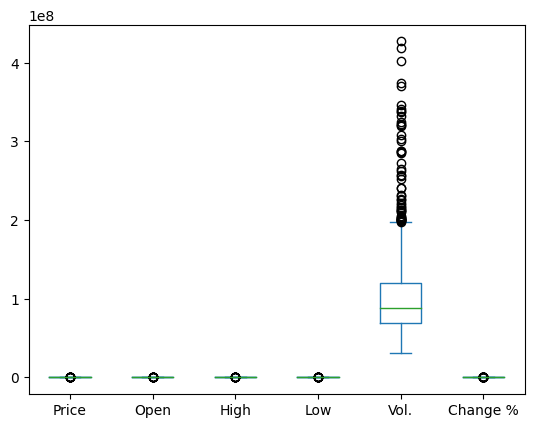

In [657]:
appl.plot.box()

Text(0, 0.5, 'Price')

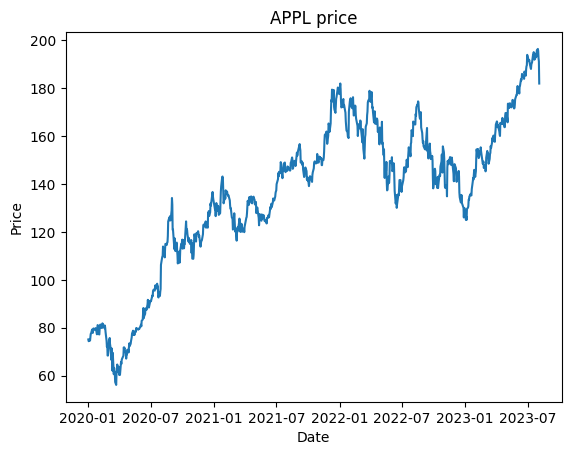

In [658]:
plt.plot(appl.index, appl["Price"])
plt.title("APPL price")
plt.xlabel("Date")
plt.ylabel("Price")

In [659]:
appl

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2023-08-04,181.99,185.52,187.38,181.92,114750000.0,-4.80
2023-08-03,191.17,191.57,192.37,190.69,52600000.0,-0.73
2023-08-02,192.58,195.04,195.18,191.85,48900000.0,-1.55
2023-08-01,195.60,196.24,196.73,195.28,34730000.0,-0.43
2023-07-31,196.45,196.06,196.49,195.26,38590000.0,0.32
...,...,...,...,...,...,...
2020-01-08,75.80,74.29,76.11,74.29,132360000.0,1.61
2020-01-07,74.60,74.96,75.22,74.37,111510000.0,-0.47
2020-01-06,74.95,73.45,74.99,73.19,118580000.0,0.79


In [660]:
appl.iloc[:-1]

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2023-08-04,181.99,185.52,187.38,181.92,114750000.0,-4.80
2023-08-03,191.17,191.57,192.37,190.69,52600000.0,-0.73
2023-08-02,192.58,195.04,195.18,191.85,48900000.0,-1.55
2023-08-01,195.60,196.24,196.73,195.28,34730000.0,-0.43
2023-07-31,196.45,196.06,196.49,195.26,38590000.0,0.32
...,...,...,...,...,...,...
2020-01-09,77.41,76.81,77.61,76.55,170490000.0,2.12
2020-01-08,75.80,74.29,76.11,74.29,132360000.0,1.61
2020-01-07,74.60,74.96,75.22,74.37,111510000.0,-0.47


In [661]:
appl.iloc[1:, 0]

Date
2023-08-03    191.17
2023-08-02    192.58
2023-08-01    195.60
2023-07-31    196.45
2023-07-28    195.83
               ...  
2020-01-08     75.80
2020-01-07     74.60
2020-01-06     74.95
2020-01-03     74.36
2020-01-02     75.09
Name: Price, Length: 903, dtype: float64

In [662]:
X = appl.iloc[:-1].values
y = appl.iloc[1:, 0].values

rf = RandomForestRegressor(oob_score=True, random_state=42) 
rf.fit(X, y)

yhat_rf = rf.predict(X)
mae_rf = metrics.mean_absolute_error(y, yhat_rf)
mse_rf = metrics.mean_squared_error(y, yhat_rf)

print(f'OOB score:      {rf.oob_score_}')
print(f'MAE:            {mae_rf}')
print(f'RMSE:           {mse_rf}')

OOB score:      0.998043186737463
MAE:            0.3528455149501645
RMSE:           0.2711800435105251


In [663]:
train.columns

Index(['Close', 'Open', 'High', 'Low', 'Volume', 'Change'], dtype='object')

In [664]:
train.iloc[:-1]

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2003-08-08,0.35,0.36,0.36,0.35,137659200,-2.78
2003-08-11,0.35,0.35,0.36,0.35,137228000,0.00
2003-08-12,0.35,0.35,0.35,0.35,164438400,0.00
2003-08-13,0.36,0.35,0.36,0.35,284099200,2.86
2003-08-14,0.36,0.36,0.36,0.36,192780000,0.00
...,...,...,...,...,...,...
2022-12-22,132.23,134.35,134.56,130.30,77852100,-2.38
2022-12-23,131.86,130.92,132.42,129.64,63814900,-0.28
2022-12-27,130.03,131.38,131.41,128.72,69007800,-1.39


### RandomForestRegressor

c:\Users\haseong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


MAE:           2.9899904283830505
MSE:           27.38382022419217
R^2:           0.9222796074089364


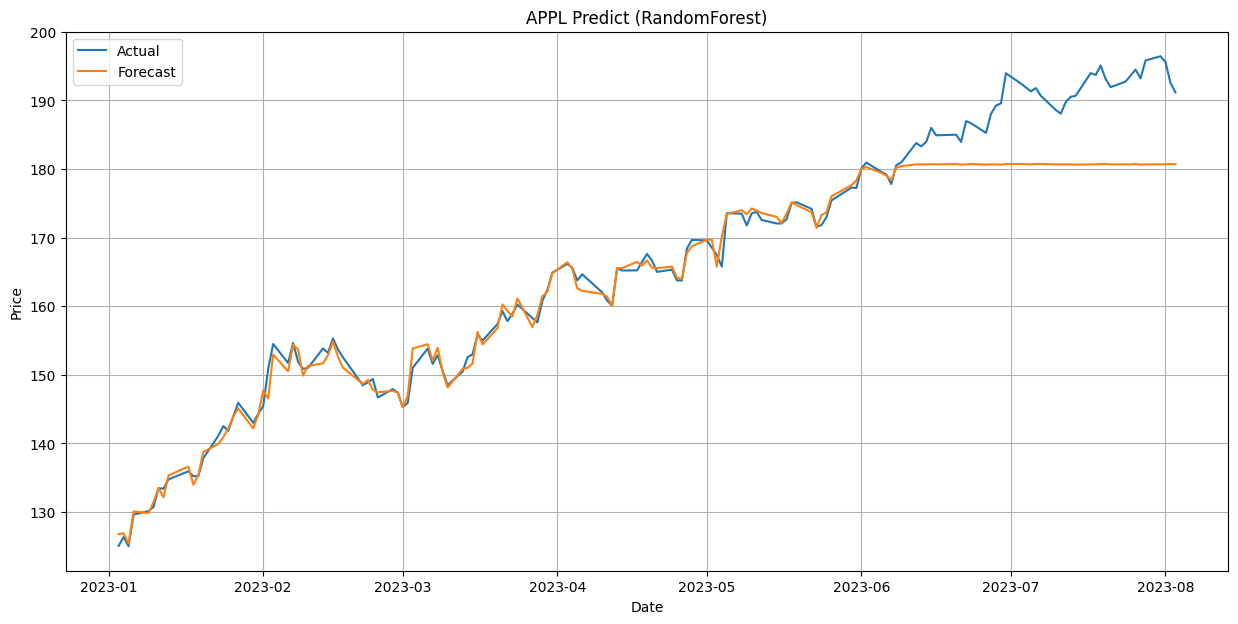

In [665]:
train = appl[appl.index.year < 2023]
test = appl[appl.index.year == 2023]

X_train = train.iloc[:-1].values
X_test = test.iloc[:-1].values
y_train = train.iloc[1:, 0].values
y_test = test.iloc[1:, 0].values

rf = RandomForestRegressor(random_state=42, bootstrap=True, max_depth=16, max_features="auto", min_samples_leaf=1, min_samples_split=6, n_estimators=100) 
rf.fit(X_train, y_train)

yhat = rf.predict(X_test)
mae = metrics.mean_absolute_error(y_test, yhat)
mse = metrics.mean_squared_error(y_test, yhat)
R2 = rf.score(X_test, y_test)

print(f'MAE:           {mae}')
print(f'MSE:           {mse}')
print(f'R^2:           {R2}')

plt.figure(figsize=(15, 7))
plt.plot(pd.to_datetime(test.iloc[1:].index), y_test)
plt.plot(pd.to_datetime(test.iloc[1:].index), yhat)
plt.legend(["Actual", "Forecast"])
plt.title("APPL Predict (RandomForest)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid()

        fit_time  score_time  test_score  train_score
case1   0.276062    0.006001    0.479935     0.998830
case2   0.273062    0.005001    0.987507     0.999043
case3   0.274062    0.005001    0.966106     0.999082
case4   0.289065    0.007002    0.978793     0.999044
case5   0.277063    0.006001    0.927630     0.998958
case6   0.271062    0.006001    0.980079     0.999019
case7   0.275062    0.006002    0.985751     0.999033
case8   0.279063    0.006002    0.952685     0.999044
case9   0.282063    0.005002    0.857398     0.999044
case10  0.274062    0.009011    0.835185     0.998815
case11  0.280063    0.006001   -0.067828     0.998575 

cross-val score mean: 0.8075673176578558 

MAE:           3.4171995241445265
MSE:           35.04372128428433
R^2:           0.9005393785904195


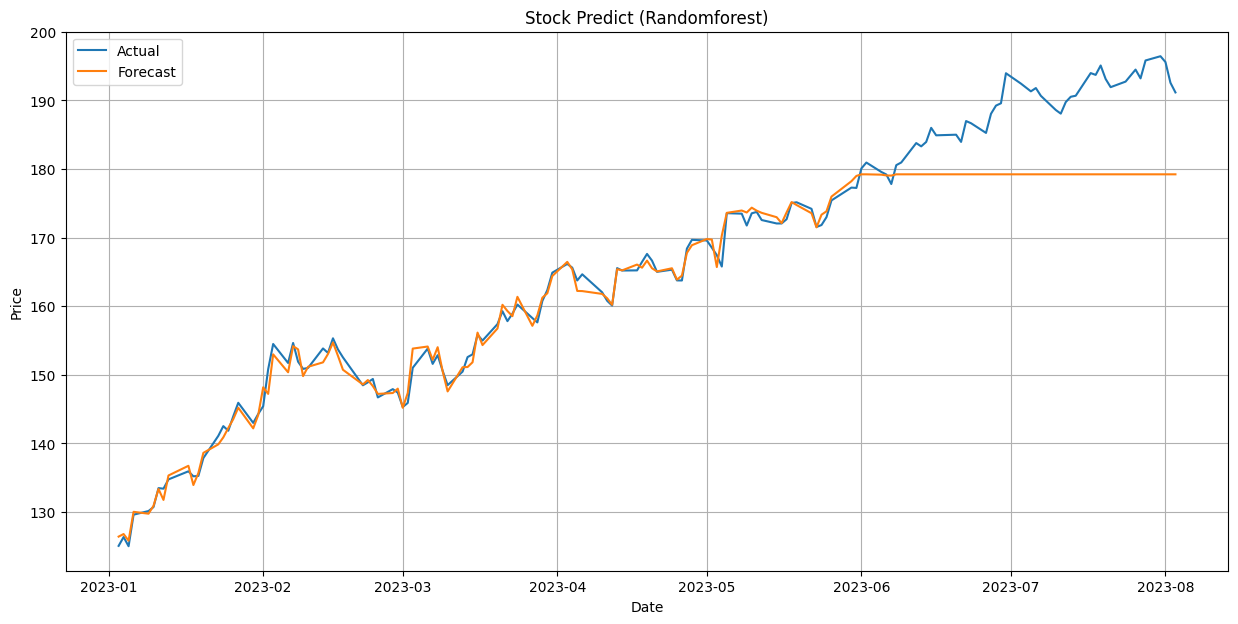

In [666]:
train = appl[appl.index.year < 2023]
test = appl[appl.index.year == 2023]

X_train = train.iloc[:-1].values
y_train = train.iloc[1:, 0].values

X_test = test.iloc[:-1].values
y_test = test.iloc[1:, 0].values

rf = RandomForestRegressor(random_state=42, bootstrap=True, max_depth=16, max_features=1.0, min_samples_leaf=5, min_samples_split=6, n_estimators=100) 
rfs = cross_validate(rf, X, y, cv=11, return_train_score=True)

cross_val_df = pd.DataFrame(rfs, index = ['case1', 'case2', 'case3', 'case4', 'case5', 'case6', 'case7', 'case8', 'case9', 'case10', 'case11'])

print(cross_val_df, '\n')
print(f'cross-val score mean: {cross_val_df["test_score"].mean()}', '\n')

rf.fit(X_train, y_train)
yhat = rf.predict(X_test)
mae = metrics.mean_absolute_error(y_test, yhat)
mse = metrics.mean_squared_error(y_test, yhat)
R2 = rf.score(X_test, y_test)

print(f'MAE:           {mae}')
print(f'MSE:           {mse}')
print(f'R^2:           {R2}')


plt.figure(figsize=(15, 7))
plt.plot(pd.to_datetime(test.iloc[1:].index), y_test)
plt.plot(pd.to_datetime(test.iloc[1:].index), yhat)
plt.legend(["Actual", "Forecast"])
plt.title("Stock Predict (Randomforest)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid()

In [480]:
rf.predict([[192.58, 195.04, 195.18, 191.85, 50389300, 1.58]])

array([179.23405118])

### KNN

***************** Neighbors = 3 *******************
MAE:            3.9232426303854933
RMSE:           39.434440891912466
R^2:           0.8880776968795288


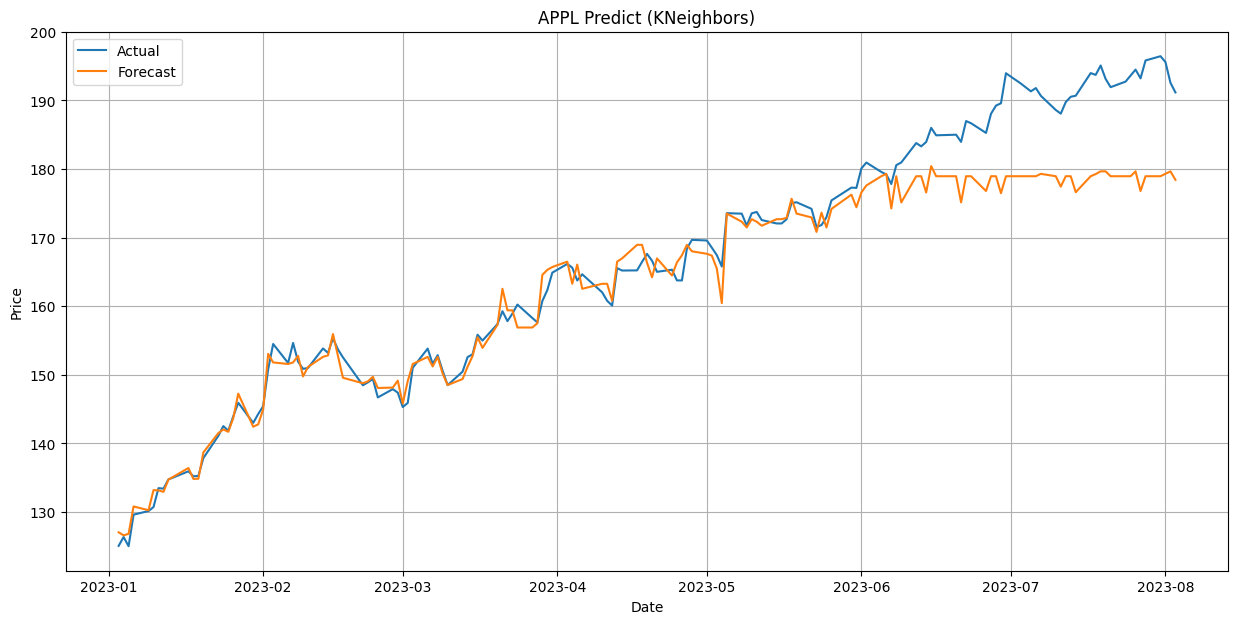

In [481]:
train = appl[appl.index.year < 2023]
valid = appl[appl.index.year >= 2023]

X_train = train.iloc[:-1].values
X_valid = valid.iloc[:-1].values
y_train = train.iloc[1:, 0].values
y_valid = valid.iloc[1:, 0].values

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_valid = ss.transform(X_valid)


kn = KNeighborsRegressor(3) 
kn.fit(X_train, y_train)

yhat = kn.predict(X_valid)
mae = metrics.mean_absolute_error(y_valid, yhat)
mse = metrics.mean_squared_error(y_valid, yhat)
R2 = kn.score(X_valid, y_valid)

print(f'***************** Neighbors = {3} *******************')
print(f'MAE:            {mae}')
print(f'RMSE:           {mse}')
print(f'R^2:           {R2}')

plt.figure(figsize=(15, 7))
plt.plot(pd.to_datetime(valid.iloc[1:].index), y_valid)
plt.plot(pd.to_datetime(valid.iloc[1:].index), yhat)
plt.legend(["Actual", "Forecast"])
plt.title("APPL Predict (KNeighbors)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid()

해외주식 경우에는 api 응답속도가 느려서 예측프로그램을 참고로 수동매매 하는게 나음 <br>
정확도가 99.4%라고 치면 1~2% 오르는 주식같은 경우에는 오차가 작아도 엄청 크게 작용함. <br>
예측한값 -2%라고 보수적으로 잡아놓고 ex) 예측상승률-2% = 5%일 때 매도 <br>
여러 모델을 만들어 놓고 모든 모델이 오른다고 예측한다면 매수.


---

# yahoo finance data

# Shallow Learning

## Library Used

In [482]:
# Data downloading library
import yfinance as yf

# basic
import os
import random
import numpy as np
import pandas as pd
from datetime import datetime
from dateutil.relativedelta import relativedelta

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
from sklearn.preprocessing import StandardScaler, MaxAbsScaler

# Shallow learning
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# Deep learning
import torch

# Metrics
import sklearn.metrics as metrics

## Config

In [483]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

seed_everything(42)

In [620]:
# Download historical stock data of Apple (AAPL) using yfinance (yf) library
# DataFrame "last_update": 2003-08-05 ~ today (2023-08-06)
# 특이 Case로, APPl의 2023.06의 데이터부터 모델이 예측을 포기하는 현상이 발견된다.
# 다른 종목들에 대해서는, 이런 현상이 모두 나타나지 않는다.
# NVDA에서도 AAPL과 똑같은 현상
# MSFT 성능 그나마 제일 좋게 나옴

yesterday = datetime.now() - relativedelta(days=1)
term = 20

start = yesterday - relativedelta(years=term)
end = yesterday

last_update = yf.download('AAPL',
                   start = start,
                   end = end,
                   progress = False)

In [621]:
df = last_update.copy()
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-08-07,0.352321,0.358750,0.346786,0.355893,0.302489,174378400
2003-08-08,0.359107,0.359464,0.350000,0.350714,0.298087,137659200
2003-08-11,0.353929,0.355893,0.348393,0.351071,0.298390,137228000
2003-08-12,0.352857,0.353571,0.347500,0.351786,0.298998,164438400
2003-08-13,0.354643,0.363214,0.349643,0.360357,0.306283,284099200
...,...,...,...,...,...,...
2023-08-01,196.240005,196.729996,195.279999,195.610001,195.610001,35175100
2023-08-02,195.039993,195.179993,191.850006,192.580002,192.580002,50389300
2023-08-03,191.570007,192.369995,190.690002,191.169998,191.169998,61235200


In [622]:
df = round(df, 2)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-08-07,0.35,0.36,0.35,0.36,0.30,174378400
2003-08-08,0.36,0.36,0.35,0.35,0.30,137659200
2003-08-11,0.35,0.36,0.35,0.35,0.30,137228000
2003-08-12,0.35,0.35,0.35,0.35,0.30,164438400
2003-08-13,0.35,0.36,0.35,0.36,0.31,284099200
...,...,...,...,...,...,...
2023-08-01,196.24,196.73,195.28,195.61,195.61,35175100
2023-08-02,195.04,195.18,191.85,192.58,192.58,50389300
2023-08-03,191.57,192.37,190.69,191.17,191.17,61235200


In [623]:
# 일 등락률 = (오늘종가 – 어제종가) / 어제종가 * 100

df["Change"] = df["Close"].pct_change() * 100
#df["Change"] = (df["Adj Close"]-df["Adj Close"].shift(1)) / df["Adj Close"].shift(1) * 100
df = df.iloc[1:, :]
df


,Open,High,Low,Close,Adj Close,Volume,Change
Date,,,,,,,
2003-08-08,0.36,0.36,0.35,0.35,0.30,137659200,-2.777778
2003-08-11,0.35,0.36,0.35,0.35,0.30,137228000,0.000000
2003-08-12,0.35,0.35,0.35,0.35,0.30,164438400,0.000000
2003-08-13,0.35,0.36,0.35,0.36,0.31,284099200,2.857143
2003-08-14,0.36,0.36,0.36,0.36,0.30,192780000,0.000000
...,...,...,...,...,...,...,...
2023-08-01,196.24,196.73,195.28,195.61,195.61,35175100,-0.427590
2023-08-02,195.04,195.18,191.85,192.58,192.58,50389300,-1.549001
2023-08-03,191.57,192.37,190.69,191.17,191.17,61235200,-0.732163


In [624]:
# S&P500: ^GSPC
# S&P500 future: ES=F
# Nasdaq future: NQ=F
# 미국 5년 만기 국채 이자율: ^FVX
# 미국 10년 만기 국채 이자율: ^TNX
# US dollar index(세계 주요 6개국 통화에 대비 미국 달러의 평균적인 가치를 나타내는 지표): DX-Y.NYB

new_feature = yf.download('DX-Y.NYB',
                    start = start,
                    end = end,
                    progress = False)

new_feature

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-08-07,96.239998,96.400002,95.559998,95.830002,95.830002,0
2003-08-08,95.809998,96.379997,95.760002,96.360001,96.360001,0
2003-08-11,96.330002,96.519997,95.690002,95.870003,95.870003,0
2003-08-12,95.860001,96.360001,95.779999,96.150002,96.150002,0
2003-08-13,96.419998,96.820000,96.070000,96.180000,96.180000,0
...,...,...,...,...,...,...
2023-08-01,101.870003,102.430000,101.849998,102.300003,102.300003,0
2023-08-02,101.959999,102.779999,101.959999,102.589996,102.589996,0
2023-08-03,102.589996,102.839996,102.370003,102.540001,102.540001,0


In [625]:
df["Dollar index"] = new_feature["Close"]
df

C:\Users\haseong\AppData\Local\Temp\ipykernel_5816\1295745759.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Dollar index"] = new_feature["Close"]


,Open,High,Low,Close,Adj Close,Volume,Change,Dollar index
Date,,,,,,,,
2003-08-08,0.36,0.36,0.35,0.35,0.30,137659200,-2.777778,96.360001
2003-08-11,0.35,0.36,0.35,0.35,0.30,137228000,0.000000,95.870003
2003-08-12,0.35,0.35,0.35,0.35,0.30,164438400,0.000000,96.150002
2003-08-13,0.35,0.36,0.35,0.36,0.31,284099200,2.857143,96.180000
2003-08-14,0.36,0.36,0.36,0.36,0.30,192780000,0.000000,96.680000
...,...,...,...,...,...,...,...,...
2023-08-01,196.24,196.73,195.28,195.61,195.61,35175100,-0.427590,102.300003
2023-08-02,195.04,195.18,191.85,192.58,192.58,50389300,-1.549001,102.589996
2023-08-03,191.57,192.37,190.69,191.17,191.17,61235200,-0.732163,102.540001


In [626]:
# 우연일 수도 있지만 2번째자리수에서 반올림하면 아주 소폭 성능이 상승한다.

df = round(df, 2)
df

,Open,High,Low,Close,Adj Close,Volume,Change,Dollar index
Date,,,,,,,,
2003-08-08,0.36,0.36,0.35,0.35,0.30,137659200,-2.78,96.36
2003-08-11,0.35,0.36,0.35,0.35,0.30,137228000,0.00,95.87
2003-08-12,0.35,0.35,0.35,0.35,0.30,164438400,0.00,96.15
2003-08-13,0.35,0.36,0.35,0.36,0.31,284099200,2.86,96.18
2003-08-14,0.36,0.36,0.36,0.36,0.30,192780000,0.00,96.68
...,...,...,...,...,...,...,...,...
2023-08-01,196.24,196.73,195.28,195.61,195.61,35175100,-0.43,102.30
2023-08-02,195.04,195.18,191.85,192.58,192.58,50389300,-1.55,102.59
2023-08-03,191.57,192.37,190.69,191.17,191.17,61235200,-0.73,102.54


In [627]:
df.isnull().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Change          0
Dollar index    2
dtype: int64

In [628]:
df = df.dropna(axis=0)
df.isnull().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Change          0
Dollar index    0
dtype: int64

In [629]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5031 entries, 2003-08-08 to 2023-08-07
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          5031 non-null   float64
 1   High          5031 non-null   float64
 2   Low           5031 non-null   float64
 3   Close         5031 non-null   float64
 4   Adj Close     5031 non-null   float64
 5   Volume        5031 non-null   int64  
 6   Change        5031 non-null   float64
 7   Dollar index  5031 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 353.7 KB


In [630]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,Change,Dollar index
count,5031.000000,5031.000000,5031.000000,5031.000000,5031.000000,5.031000e+03,5031.000000,5031.000000
mean,39.254409,39.691016,38.833536,39.279481,37.828332,4.113719e+08,0.145351,88.667376
std,49.549439,50.133392,49.010692,49.596049,49.584770,3.946577e+08,2.116099,8.717407
min,0.350000,0.350000,0.340000,0.350000,0.300000,3.145820e+07,-17.900000,71.330000
25%,4.980000,5.040000,4.890000,4.980000,4.230000,1.186070e+08,-0.860000,80.975000
50%,20.050000,20.240000,19.820000,20.020000,17.290000,2.786028e+08,0.040000,88.760000
75%,44.605000,45.015000,44.215000,44.605000,42.525000,5.767356e+08,1.235000,95.980000
max,196.240000,198.230000,195.280000,196.450000,196.450000,3.372970e+09,13.870000,114.110000


In [631]:
# Making sure the DataFrame is in ascending order based on the "Date" column
df = df.sort_values(by='Date', ascending=True)
df

,Open,High,Low,Close,Adj Close,Volume,Change,Dollar index
Date,,,,,,,,
2003-08-08,0.36,0.36,0.35,0.35,0.30,137659200,-2.78,96.36
2003-08-11,0.35,0.36,0.35,0.35,0.30,137228000,0.00,95.87
2003-08-12,0.35,0.35,0.35,0.35,0.30,164438400,0.00,96.15
2003-08-13,0.35,0.36,0.35,0.36,0.31,284099200,2.86,96.18
2003-08-14,0.36,0.36,0.36,0.36,0.30,192780000,0.00,96.68
...,...,...,...,...,...,...,...,...
2023-08-01,196.24,196.73,195.28,195.61,195.61,35175100,-0.43,102.30
2023-08-02,195.04,195.18,191.85,192.58,192.58,50389300,-1.55,102.59
2023-08-03,191.57,192.37,190.69,191.17,191.17,61235200,-0.73,102.54


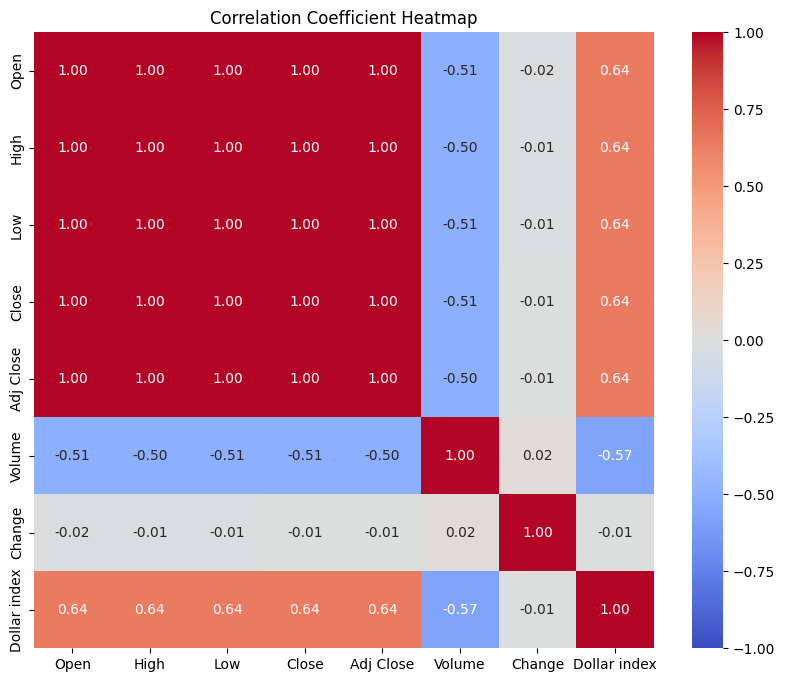

% of highly correlated pairs: 62.5 %


In [632]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True,
            cmap='coolwarm',
            vmin=-1, vmax=1,
            fmt='.2f')

# Add a title to the heatmap
plt.title("Correlation Coefficient Heatmap")

# Show the plot
plt.show()

# Find pairs of columns with correlation coefficients >= 0.5 or <= -0.5
high_corr = 0
num_cols = len(df.columns)
for column1 in correlation_matrix.columns:
    for column2 in correlation_matrix.columns:
        if column1 != column2 and abs(correlation_matrix.loc[column1, column2]) >= 0.5:
            high_corr += 1
print(f"% of highly correlated pairs: {high_corr/(num_cols**2)*100:.1f} %")

<AxesSubplot: >

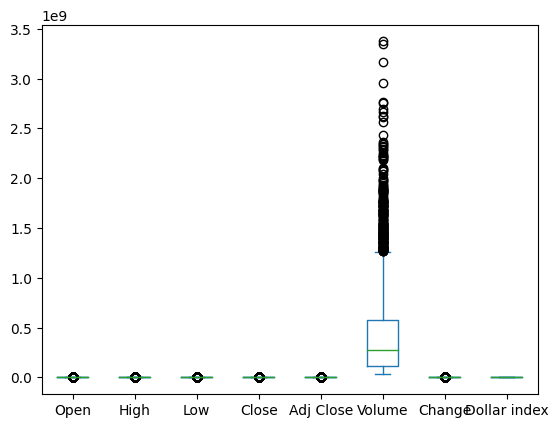

In [633]:
df.plot.box()

In [634]:
# Adj is dictated by company policy which is relatively random compared to other variables
# and thus would not be suitable for this exploratory data analysis
df = df.drop(columns=['Adj Close'])
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Change', 'Dollar index'], dtype='object')

In [635]:
appl.sort_index()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2003-08-04,0.38,0.37,0.38,0.36,230120000.0,2.70
2003-08-05,0.36,0.38,0.38,0.36,249440000.0,-5.26
2003-08-06,0.35,0.36,0.36,0.35,245470000.0,-2.78
2003-08-07,0.36,0.35,0.36,0.35,174970000.0,2.86
2003-08-08,0.35,0.36,0.36,0.35,137850000.0,-2.78
...,...,...,...,...,...,...
2023-06-06,179.21,179.96,180.12,177.43,64340000.0,-0.21
2023-06-07,177.82,178.44,181.21,177.32,61940000.0,-0.78
2023-06-08,180.57,177.90,180.84,177.46,50210000.0,1.55


In [636]:
df

,Open,High,Low,Close,Volume,Change,Dollar index
Date,,,,,,,
2003-08-08,0.36,0.36,0.35,0.35,137659200,-2.78,96.36
2003-08-11,0.35,0.36,0.35,0.35,137228000,0.00,95.87
2003-08-12,0.35,0.35,0.35,0.35,164438400,0.00,96.15
2003-08-13,0.35,0.36,0.35,0.36,284099200,2.86,96.18
2003-08-14,0.36,0.36,0.36,0.36,192780000,0.00,96.68
...,...,...,...,...,...,...,...
2023-08-01,196.24,196.73,195.28,195.61,35175100,-0.43,102.30
2023-08-02,195.04,195.18,191.85,192.58,50389300,-1.55,102.59
2023-08-03,191.57,192.37,190.69,191.17,61235200,-0.73,102.54


In [637]:
df = df[["Close", "Open", "High", "Low", "Volume", "Change"]]
df.loc[df["Change"].idxmin()]

Close     3.760000e+00
Open      4.270000e+00
High      4.270000e+00
Low       3.590000e+00
Volume    2.622057e+09
Change   -1.790000e+01
Name: 2008-09-29 00:00:00, dtype: float64

In [638]:
appl.sort_index()
appl[appl["Change %"] == appl["Change %"].min()]

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2016-02-29,24.17,24.21,24.56,24.16,140870000.0,-75.07


In [639]:
df.loc["2016-02-29 00:00:00"]

Close     2.417000e+01
Open      2.422000e+01
High      2.456000e+01
Low       2.416000e+01
Volume    1.408652e+08
Change   -2.500000e-01
Name: 2016-02-29 00:00:00, dtype: float64

In [640]:
appl.describe() # investing.com

,Price,Open,High,Low,Vol.,Change %
count,4999.000000,4999.000000,4999.000000,4999.000000,4.999000e+03,4999.000000
mean,38.098974,38.073147,38.501766,37.659396,4.143011e+08,0.131772
std,47.987620,47.937177,48.520649,47.397391,3.954786e+08,2.374355
min,0.350000,0.350000,0.350000,0.340000,3.520000e+07,-75.070000
25%,4.915000,4.940000,4.990000,4.855000,1.212850e+08,-0.865000
50%,19.670000,19.760000,19.890000,19.460000,2.820400e+08,0.040000
75%,43.815000,43.775000,44.070000,43.545000,5.844350e+08,1.240000
max,183.790000,182.630000,184.950000,180.970000,3.370000e+09,13.870000


In [641]:
df.describe()   # yahoo finance

,Close,Open,High,Low,Volume,Change
count,5031.000000,5031.000000,5031.000000,5031.000000,5.031000e+03,5031.000000
mean,39.279481,39.254409,39.691016,38.833536,4.113719e+08,0.145351
std,49.596049,49.549439,50.133392,49.010692,3.946577e+08,2.116099
min,0.350000,0.350000,0.350000,0.340000,3.145820e+07,-17.900000
25%,4.980000,4.980000,5.040000,4.890000,1.186070e+08,-0.860000
50%,20.020000,20.050000,20.240000,19.820000,2.786028e+08,0.040000
75%,44.605000,44.605000,45.015000,44.215000,5.767356e+08,1.235000
max,196.450000,196.240000,198.230000,195.280000,3.372970e+09,13.870000


In [642]:
train = df[df.index.year <= 2022]
test = df[df.index.year == 2023]
n_data = train.shape[0] + test.shape[0]
print(f"train shape: {train.shape},  {int(train.shape[0]/n_data *100)} % \ntest shape : {test.shape},  {int(test.shape[0]/n_data *100)} %")

train shape: (4882, 6),  97 % 
test shape : (149, 6),  2 %


c:\Users\haseong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


MAE:           4.458760266088072
MSE:           43.594451716552534
R^2:           0.8723100425642965


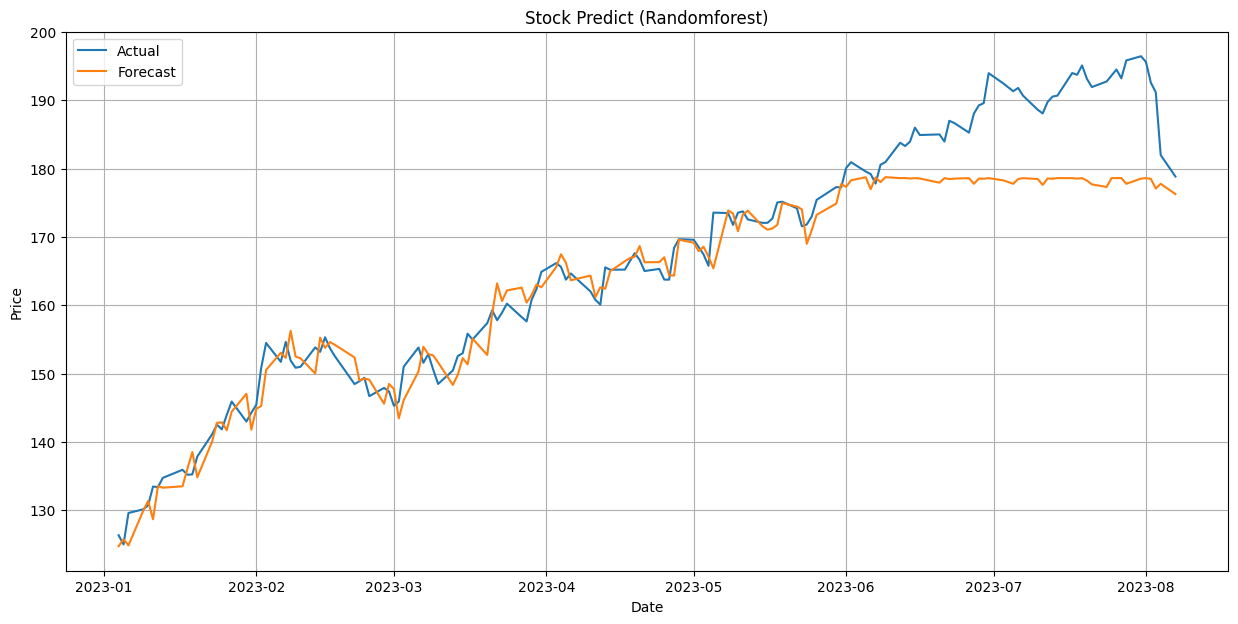

In [643]:
X_train = train.iloc[:-1].values
y_train = train.iloc[1:, 0].values

X_test = test.iloc[:-1].values
y_test = test.iloc[1:, 0].values

rf = RandomForestRegressor(random_state=42, bootstrap=True, max_depth=16, max_features="auto", min_samples_leaf=1, min_samples_split=6, n_estimators=100) 
rf.fit(X_train, y_train)

yhat = rf.predict(X_test)
mae = metrics.mean_absolute_error(y_test, yhat)
mse = metrics.mean_squared_error(y_test, yhat)
R2 = rf.score(X_test, y_test)

print(f'MAE:           {mae}')
print(f'MSE:           {mse}')
print(f'R^2:           {R2}')


plt.figure(figsize=(15, 7))
plt.plot(pd.to_datetime(test.iloc[1:].index), y_test)
plt.plot(pd.to_datetime(test.iloc[1:].index), yhat)
plt.legend(["Actual", "Forecast"])
plt.title("Stock Predict (Randomforest)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid()


# stock = GOOG
# columns = "Close", "Open", "High", "Low", "Volume"
# term = 5)  MAE: 2.112100707592608,  MSE: 7.547230740923123,  R^2: 0.9549159134834734
# term = 10) MAE: 2.072141540942549,  MSE: 7.093291730724242,  R^2: 0.9576275604850767  >>> best?
# term = 20) MAE: 2.1226738842814954, MSE: 7.4114207847891285, R^2: 0.9557271869190331
# term = 40) MAE: 2.1226738842814954, MSE: 7.4114207847891285, R^2: 0.9557271869190331


#################################################

# columns = "Close", "Open", "High", "Low", "Volume"
# MAE:           2.11987169019219
# MSE:           7.341723714218125
# R^2:           0.9561435288684761

# columns = "Close", "Open", "High", "Low", "Volume", "Change"  >>> good
# MAE:           2.0323159499395462
# MSE:           6.882812590580972
# R^2:           0.9588848772532907

# columns = "Close", "Open", "High", "Low", "Volume", "S&P500"  >>> ?
# MAE:           2.106664777483258
# MSE:           7.546347929611459
# R^2:           0.9549211870391549

# columns = "Close", "Open", "High", "Low", "Volume", "S&P500 futue"    >>> good
# MAE:           2.0755342730048563
# MSE:           7.059418065460446
# R^2:           0.957829907982829

# columns = "Close", "Open", "High", "Low", "Volume", "Nasdaq future"   >>> good
# MAE:           2.1079902804627717
# MSE:           7.041222645297052
# R^2:           0.9579386000216722

# columns = "Close", "Open", "High", "Low", "Volume", "Bond rates(5)"   >>> bad
# MAE:           2.1645695864100034
# MSE:           7.4872877896440295
# R^2:           0.9552739882918755

# columns = "Close", "Open", "High", "Low", "Volume", "Bond rates(10)"  >>> bad
# MAE:           2.1321283535081514
# MSE:           7.590575644704663
# R^2:           0.9546569886593599

# columns = "Close", "Open", "High", "Low", "Volume", "Dollar index"    >>> good
# MAE:           2.060810230281078
# MSE:           6.968373603847073
# R^2:           0.9583737705630428

# columns = "Close", "Open", "High", "Low", "Volume", "Nasdaq future", "Change"
# MAE:           2.0474863750431815
# MSE:           6.711704726741979
# R^2:           0.9599070060316183

# columns = "Close", "Open", "High", "Low", "Volume", "Change", "S&P500 future", "Dollar index"
# MAE:           2.030563883878747
# MSE:           6.826729953253438
# R^2:           0.9592198921163769

        fit_time  score_time  test_score  train_score
case1   1.606364    0.007002   -0.087425     0.999887
case2   1.591357    0.007002    0.789829     0.999934
case3   1.611364    0.007001    0.529430     0.999921
case4   1.599362    0.008003    0.992818     0.999920
case5   1.595360    0.007001    0.986977     0.999921
case6   1.583358    0.008003    0.989315     0.999920
case7   1.610363    0.007001    0.982449     0.999919
case8   1.576356    0.011003    0.864387     0.999916
case9   1.591360    0.008002    0.992160     0.999916
case10  1.624367    0.008004    0.590897     0.999915
case11  1.641370    0.006001   -2.010593     0.999914 

cross-val score mean: 0.5109311426338244 

MAE:           4.508402007281124
MSE:           46.070103801503684
R^2:           0.8650587549140152


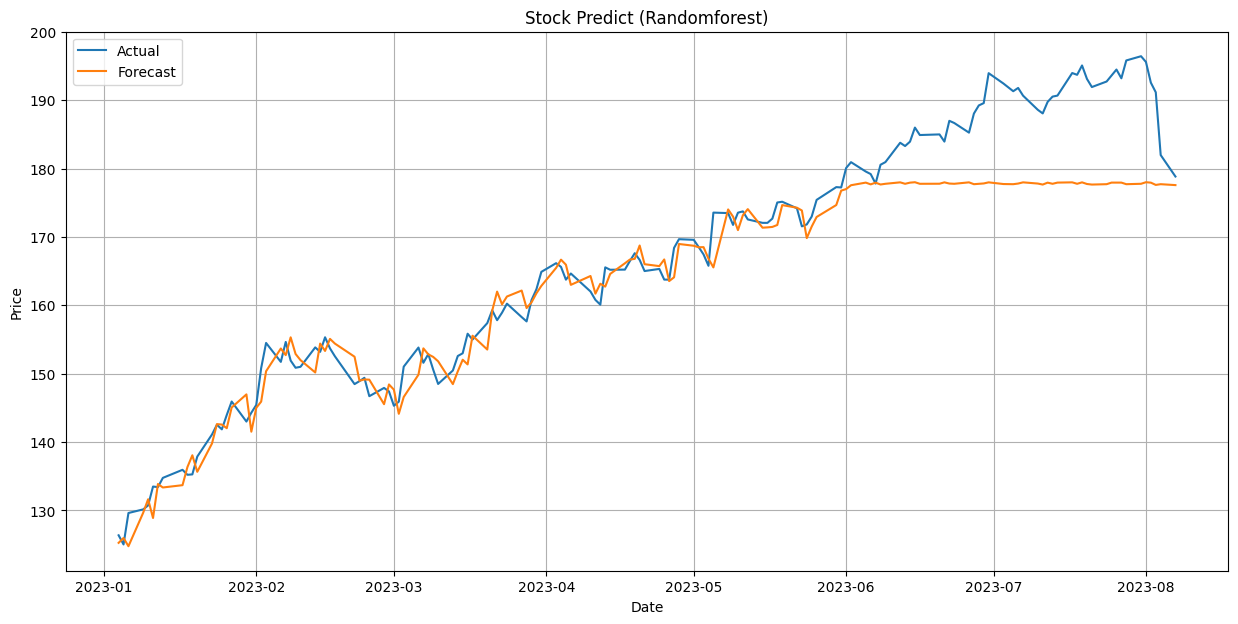

In [645]:
X_train = train.iloc[:-1].values
y_train = train.iloc[1:, 0].values

rf = RandomForestRegressor(random_state=42, bootstrap=True, max_depth=16, max_features=1.0, min_samples_leaf=5, min_samples_split=6, n_estimators=100) 
rfs = cross_validate(rf, X, y, cv=11, return_train_score=True)

cross_val_df = pd.DataFrame(rfs, index = ['case1', 'case2', 'case3', 'case4', 'case5', 'case6', 'case7', 'case8', 'case9', 'case10', 'case11'])

print(cross_val_df, '\n')
print(f'cross-val score mean: {cross_val_df["test_score"].mean()}', '\n')

rf.fit(X_train, y_train)
yhat = rf.predict(X_test)
mae = metrics.mean_absolute_error(y_test, yhat)
mse = metrics.mean_squared_error(y_test, yhat)
R2 = rf.score(X_test, y_test)

print(f'MAE:           {mae}')
print(f'MSE:           {mse}')
print(f'R^2:           {R2}')


plt.figure(figsize=(15, 7))
plt.plot(pd.to_datetime(test.iloc[1:].index), y_test)
plt.plot(pd.to_datetime(test.iloc[1:].index), yhat)
plt.legend(["Actual", "Forecast"])
plt.title("Stock Predict (Randomforest)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid()

In [ ]:
X_train = train.iloc[:-1].values
y_train = train.iloc[1:, 0].values

rf = RandomForestRegressor(random_state=42, bootstrap=True, max_depth=16, max_features=1.0, min_samples_leaf=5, min_samples_split=6, n_estimators=100) 
cv_scores = []

for i in range(2, 20):
    scores = cross_val_score(rf, X, y, cv=i, scoring="r2")
    print(f'cv={i} # cross_val_score: {scores.mean()}')



In [ ]:
X_train = train.iloc[:-1].values
y_train = train.iloc[1:, 0].values

X_test = test.iloc[:-1].values
y_test = test.iloc[1:, 0].values

params ={
    'n_estimators':[50, 100, 200],
    'max_depth':[8 ,10, 12, 14, 16],
    'min_samples_leaf':[1, 2, 4, 6, 8],
    'min_samples_split':[4, 6, 8, 10, 12],
    "max_features"      : ["auto", "sqrt", "log2"],
    "bootstrap": [True, False],
}

rf = RandomForestRegressor(random_state=42) 
rf.fit(X_train, y_train)
grid_cv = GridSearchCV(rf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train,y_train)

print(f"Best Param: {grid_cv.best_params_}")
max_depth = grid_cv.best_params_['max_depth']
min_samples_leaf = grid_cv.best_params_['min_samples_leaf']
min_samples_split = grid_cv.best_params_['min_samples_split']
n_estimators = grid_cv.best_params_['n_estimators']

#각 열 추출해서 R Score값 비교
rf = RandomForestRegressor(n_estimators= n_estimators, max_depth=max_depth, min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split)
rf.fit(X_train,y_train)
